# Online Delivery Analysis

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset .csv")   
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df = df.dropna(subset=["Has Online delivery", "Aggregate rating"])

In [5]:
delivery_counts = df["Has Online delivery"].value_counts()
print(delivery_counts)

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


In [7]:
delivery_percentage = (
    df["Has Online delivery"]
    .value_counts(normalize=True) * 100)

print(delivery_percentage)

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [8]:
for status, percent in delivery_percentage.items():
    print(f"{status} : {percent:.2f}%")

No : 74.34%
Yes : 25.66%


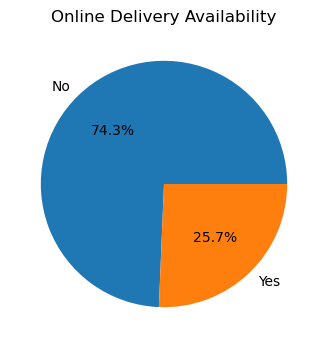

In [12]:
plt.figure(figsize=(5,4))

plt.pie(
    delivery_percentage,
    labels=delivery_percentage.index,
    autopct="%1.1f%%")

plt.title("Online Delivery Availability")
plt.show()

In [13]:
avg_ratings = (
    df.groupby("Has Online delivery")["Aggregate rating"]
    .mean()
)

print(avg_ratings)

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


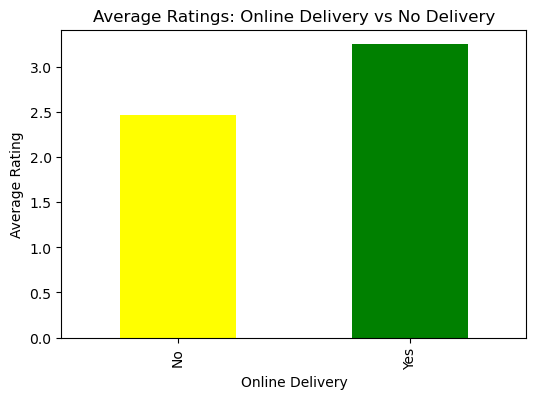

In [24]:
avg_ratings.plot(kind="bar", figsize=(6,4),color=["yellow","green"])

plt.title("Average Ratings: Online Delivery vs No Delivery")
plt.xlabel("Online Delivery")
plt.ylabel("Average Rating")
plt.show()

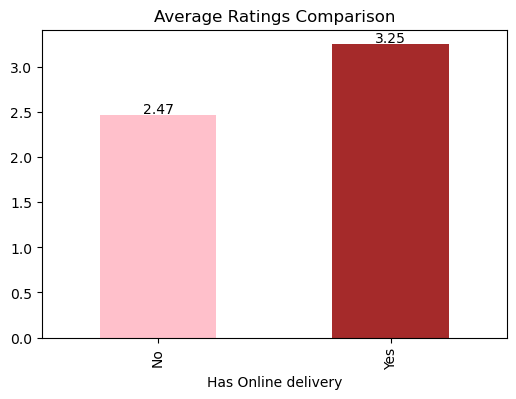

In [22]:
ax = avg_ratings.plot(kind="bar", figsize=(6,4),color=["pink","brown"])

for i, v in enumerate(avg_ratings):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.title("Average Ratings Comparison")
plt.show()